<a href="https://colab.research.google.com/github/CheayeonLee/2024_summer_project/blob/main/%5B%EC%BD%94%EB%94%A9%ED%85%8C%EC%8A%A4%ED%8A%B8_2%EB%8B%A8%EA%B3%84%5D%EC%9D%B4%EC%B1%84%EC%97%B0_%EB%AC%B8%ED%97%8C%EC%A0%95%EB%B3%B4%ED%95%99%EA%B3%BC_2183016.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 필독
---
**코딩 테스트 응시 방법**  
본 파일은 배포용으로, 사본을 만들어 문제 풀이를 진행해주세요.  

**평가 관련**  
문제 해결 능력을 중심으로 평가합니다.  
구현 시, 예제와 같은 구성을 따를 필요는 없습니다.  
필요없다 생각하는 부분을 덜거나, 필요하다 생각하는 부분들을 추가하셔도 됩니다. 완전히 구조가 달라도 상관 없습니다.  

 만일 구현에 실패한 부분이 있다면 무엇을 구현하고자 했지만 실패했는지, 구현 의도와 실패한 코드를 남겨주세요.  

**제출 양식**
- 제목 : [코딩 테스트/단계]이름_ 과 _학번

**구현,작업 관리 주의사항**  
아래 4가지 규칙을 지켜 구현한 코드와 보고서를 함께 제출해주신 모든 벗들과 면접을 진행할 예정입니다. 꼭 읽고 지켜주세요!

- 📍**딥러닝 프레임워크는 pytorch를 사용해주세요.**
- 📍**코드 설명을 달아주세요.**
- 📍**코드 출력을 지우지 말고 제출해주세요.**
- 📍**공유 권한을 설정해주세요.**


# 데이터 셋에 대해
---
사용한 데이터 셋 : CIFAR10  
CIFAR10은 32x32 규격의 컬러 이미지 데이터 셋입니다.  
이 데이터 셋에는 총 10개의 라벨이 존재하며, MNIST 데이터 셋과 함께 이미지 학습에 널리 이용되는 예제입니다.  
`pytorch.vision`이나 인터넷을 통해 손쉽게 다운받을 수 있지만, 작업의 편의를 위해 데이터 셋은 파일로 제공합니다.

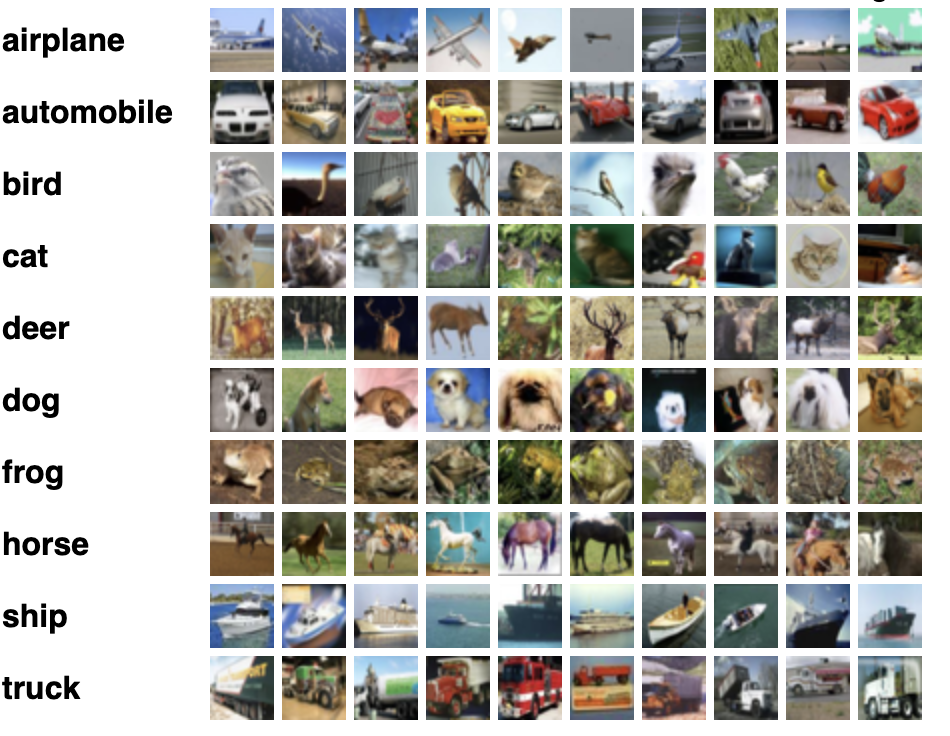

---
[CIFAR10 데이터 셋 다운받기](https://drive.google.com/file/d/1s7gmRxPvxDP4tYMryi4_KMMs0XkfMc66/view?usp=drive_link)  
제공되는 데이터 셋은 **pickle 파일**로 저장되어 있습니다.  
데이터 셋은 `pd.DataFrame` 구조로, image column, label column으로 이루어져 있습니다.  
데이터 타입은 `image : np.array, label : string` 입니다.   

---
예제 구현에 참고한 공식 문서를 첨부합니다.  
[파이토치 공식 문서 : CIFAR 10 학습시키기](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)

### [📕 [강화 시스터즈] 02 단계 코딩 테스트 예제](https://colab.research.google.com/drive/1W6Y8sj_M94qbkVWWcrcuD1_DDsL9FUB3?usp=sharing)

# CIFAR10 데이터 중 강아지 + 고양이 + 교통수단만 학습에 이용하기

# Dataset and Loader

In [ ]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

import torch
from torchvision import datasets
from torchvision.transforms import ToTensor

from torch.utils.data import Dataset
from torch.utils.data import DataLoader

import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pickle

# 데이터를 불러옴
with open("/content/drive/MyDrive/CIFAR10_dataset.csv","rb") as f:
    ans_dataset = pickle.load(f)

ans_dataset.head(5)

,image,label
0,"[[[59, 62, 63], [43, 46, 45], [50, 48, 43], [6...",frog
1,"[[[154, 177, 187], [126, 137, 136], [105, 104,...",truck
2,"[[[255, 255, 255], [253, 253, 253], [253, 253,...",truck
3,"[[[28, 25, 10], [37, 34, 19], [38, 35, 20], [4...",deer
4,"[[[170, 180, 198], [168, 178, 196], [177, 185,...",automobile


In [ ]:
set(ans_dataset['label'])

{'airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck'}

In [ ]:
# set으로 중복을 제거한 후 label을 list형태로 변환
# sorted로 알파벳 순서대로 배열
sorted(list(set(ans_dataset['label'])))

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

### 강아지 + 고양이 + 교통수단만 학습에 이용하기

In [ ]:
image_pick = ['truck','cat','airplane','ship','dog','automobile']

In [ ]:
# image_pick에 해당하는 값들로만 필터링
ans_dataset = ans_dataset[ans_dataset['label'].isin(image_pick)]
ans_dataset.head(10)

,image,label
1,"[[[154, 177, 187], [126, 137, 136], [105, 104,...",truck
2,"[[[255, 255, 255], [253, 253, 253], [253, 253,...",truck
4,"[[[170, 180, 198], [168, 178, 196], [177, 185,...",automobile
5,"[[[159, 102, 101], [150, 91, 95], [153, 95, 97...",automobile
8,"[[[134, 186, 223], [131, 184, 220], [128, 182,...",ship
9,"[[[125, 125, 116], [110, 101, 91], [102, 90, 8...",cat
14,"[[[100, 146, 192], [98, 144, 189], [99, 144, 1...",truck
15,"[[[100, 168, 231], [100, 168, 229], [101, 167,...",truck
16,"[[[235, 236, 238], [235, 236, 238], [237, 238,...",truck
17,"[[[110, 104, 97], [142, 135, 118], [151, 146, ...",cat


In [ ]:
# 결과 확인
sorted(list(set(ans_dataset['label'])))

['airplane', 'automobile', 'cat', 'dog', 'ship', 'truck']

### CustomDataset
많은 양의 data를 한번에 불러오려면 시간이 오래걸리는 것을 넘어서 RAM이 터지는 일이 발생

데이터를 한번에 다 부르지 않고 하나씩만 불러서 쓰는 방식


class CustomDataset은 총 3개의 함수로 구성되어 있다.
<br>
1. def __init__(self,data, transform=None) <br>
먼저 클래스가 실행될 때 자동으로 호출되는 생성자(constructor)의 역할을 하는 __init__ 함수이다. 여기에는 input으로 들어온 변수인 '데이터, transform 여부' 의 정보를 self로 넘겨주어 초기화해주는 역할을 하는 함수
<br>
2. def __len__(self)<br>
 데이터의 size을 리턴하도록 한다.
<br>
3. def __getitem__(self,index)<br>
이름 그대로 item을 얻는 함수이며 input에 index을 넣어주면 그 index의 데이터를 불러오는 함수이다. 앞서 __init__ 함수에서 지정한 transform 여부를 확인한 후, image와 label의 transform을 진행하는 코드 또한 포함한다.

In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision.io import read_image
from torchvision.transforms import ToTensor

class CustomDataset(Dataset):
    def __init__(self, data, transform=None):
        self.data = data
        self.transform = transform # 이미지에 적용할 전처리(transform) 파이프라인을 전달받음

    def __len__(self):
        return len(self.data) # DataLoader가 배치(batch)를 구성하는 데 사용

    def __getitem__(self, index):
        img = self.data.iloc[index, 0] # index행의 첫 번째 열
        label = self.data.iloc[index, 1] # index행의 두 번째 열

        if self.transform:
            img = self.transform(img) # 만약 transform이 지정되었다면, 이미지를 전처리

        return img, label

#############################################################################################
# Label Encoding
# label을 학습 가능하도록 범주형 데이터를 숫자로 변환
from sklearn.preprocessing import LabelEncoder

# 각 라벨을 고유한 숫자로 변환
label_encoder = LabelEncoder()
ans_dataset['label'] = label_encoder.fit_transform(ans_dataset['label'])

# tensor 변환 후 데이터 타입은 long (64비트 정수)으로 지정
def label_to_tensor(label):
    return torch.tensor(label, dtype=torch.long)

dataset = CustomDataset(data=ans_dataset, transform=label_to_tensor)
dataset[0][0].shape # 첫 번째 샘플의 첫 번째 이미지

torch.Size([32, 32, 3])

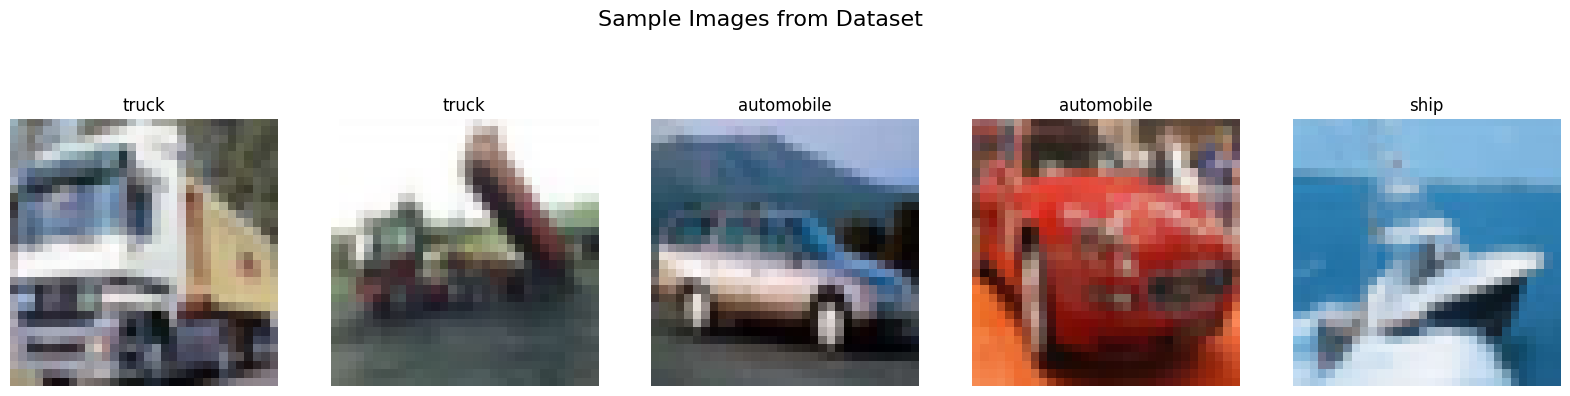

In [ ]:
def plot_images(dataset, num_images, label_encoder):
    fig, axes = plt.subplots(1, num_images, figsize=(20, 5))
    for i in range(num_images):
        img = dataset['image'].iloc[i]
        label_encoded = dataset['label'].iloc[i] # encoding된 label을 가져옴
        label = label_encoder.inverse_transform([label_encoded])[0] # inverse_transform으로 인코딩된 숫자를 다시 원래의 클래스 라벨로 변환
        axes[i].imshow(img)
        axes[i].set_title(f"{label}")
        axes[i].axis('off')
    plt.suptitle("Sample Images from Dataset", fontsize=16)
    plt.show()

# 예제 이미지 5개 시각화
plot_images(ans_dataset, 5, label_encoder)

### traindata, testdata

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data= train_test_split(ans_dataset,
                                        test_size=0.2) # train:test를 8:2로 split
train_data.shape, test_data.shape

((28800, 2), (7200, 2))

In [ ]:
traindata = CustomDataset(train_data, transform=ToTensor()) # CustomDataset을 이용한 traindata / tensor로 변환
testdata = CustomDataset(test_data, transform=ToTensor()) # CustomDataset을 이용한 testdata / tensor로 변환

In [ ]:
trainloader = DataLoader(traindata, batch_size=64, shuffle=True) # trainloader 생성
testloader = DataLoader(testdata, batch_size=64, shuffle=True) # testloader 생성

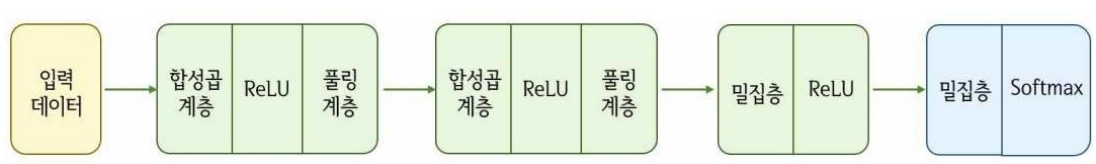

In [ ]:
import torch.nn as nn            # 신경망 구성 layer
import torch.optim as optim      # 최적화 기법
import torch.nn.init             # 초기화 기법
import torch.nn.functional as F  # Fully-connected layer과 F.cross_entropy()을 사용하기 위해

# torch.nn.Linear bias는 True가 default
class Model(nn.Module):
    def __init__(self): # 파이썬에서 클래스의 생성자(constructor)에 해당하는 init 함수로, 클래스가 호출되면 자동으로 호출
        super(Model, self).__init__() # nn.Module의 초기화 메서드를 호출하여 기본 설정을 적용

        # layer 정의(2개의 합성곱 layer 정)
        self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 20, kernel_size = 5,stride = 1)
        self.conv2 = nn.Conv2d(in_channels = 20,out_channels = 10, kernel_size = 5,stride = 1)
        self.pool = nn.MaxPool2d(kernel_size = 2) # 최대풀링적용
        self.fc1 = nn.Linear(10*5*5, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.fc4 = nn.Linear(10, 6)
        self.relu = nn.ReLU() # 활성화 함수로 ReLU 사용

    def forward(self, x): #self 랑 x 매개변수로 상속 받음

        # 연산 진행
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)

        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)

        x = x.view(x.shape[0],-1) # 배치사이즈를 유지하면서 1차원으로 평탄화
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.fc4(x)

        return x # softmax 함수를 쓰지 않은 이유는, loss 함수인 nn.CrossEntropyLoss()에서 내부적으로 softmax를 해주기 때문

In [ ]:
model = Model() # 모델
learning_rate = 1e-3 # 학습률
epochs = 20 # 전체 데이터셋 20번 반복
lossfunc = nn.CrossEntropyLoss() # 분류 문제이므로 CrossEntropyLoss 사용
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) # 자동으로 학습률을 조정하고 더 빠른 수렴을 돕는 Adam을 사용

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# 아래 부분은 거의 모든 코드에서 규칙처럼 사용하는 부분이라 todo code로 두고 구글링해서 충분히 작성 가능
train_loss, train_acc = [], []
test_loss, test_acc = [], []
for epoch in range(epochs):
    print("")
    print('========{:}번째 Epoch / 전체 {:}회 ========'.format(epoch + 1, epochs))

    model.train() # 학습 mode
    total_train_loss = 0 # 전체 train loss를 누적
    correct_train = 0 # 올바르게 예측된 샘플의 수를 누적
    total_train = 0 # 전체 샘플 수를 누적

    for i, (img, label) in enumerate(trainloader): # trainloader에서 배치 단위로 img, label 가져옴
        prediction = model(img) # model 사용해 이미지 예측
        loss = lossfunc(prediction, label) # loss 계산
        optimizer.zero_grad() # 이전 배치 기울기가 누적되지 않도록 초기화
        loss.backward() # loss에 대한 기울기 계산
        optimizer.step() # 기울기에 기반에 model parameter update

        total_train_loss += loss.item() # 현재 배치의 loss를 전체 loss에 누적
        correct_train += (torch.argmax(prediction, dim=1) == label).sum().item() # 현재 배치에서 올바르게 예측된 샘플 수를 누적합니다
        total_train += label.size(0) # 현재 배치의 샘플 수를 전체 샘플 수에 누적

    avg_train_loss = total_train_loss / len(trainloader) # 평균 손실 계산
    avg_train_acc = correct_train / total_train # 정확도 계산

    # 손실 값과 정확도 저장
    train_loss.append(avg_train_loss)
    train_acc.append(avg_train_acc)
    print(f"[train] loss: {avg_train_loss:.6f} | acc: {avg_train_acc:.6f}")

    model.eval() # 검증 mode로 바꿈
    total_test_loss = 0 # 전체 test loss를 누적
    correct_test = 0 # 올바르게 예측된 샘플의 수를 누적
    total_test = 0 # 전체 샘플 수를 누적

    with torch.no_grad(): # 기울기 계산x
        for i, (img, label) in enumerate(testloader): # testloader에서 배치 단위로 img, label 가져옴
            prediction = model(img) # model 사용해 이미지 예측
            loss = lossfunc(prediction, label) # loss 계산

            total_test_loss += loss.item()  # 현재 배치의 loss를 전체 loss에 누적
            correct_test += (torch.argmax(prediction, dim=1) == label).sum().item() # 현재 배치에서 올바르게 예측된 샘플 수를 누적합니다
            total_test += label.size(0) # 현재 배치의 샘플 수를 전체 샘플 수에 누적

        avg_test_loss = total_test_loss / len(testloader) # 평균 손실 계산
        avg_test_acc = correct_test / total_test # 정확도 계산

        # 손실 값과 정확도 저장
        test_loss.append(avg_test_loss)
        test_acc.append(avg_test_acc)
        print(f"[test] loss: {avg_test_loss:.6f} | acc: {avg_test_acc:.6f}")


print("")
print("Training complete!")


========1번째 Epoch / 전체 20회 ========
[train] loss: 1.411992 | acc: 0.385799
[test] loss: 1.140185 | acc: 0.505694

========2번째 Epoch / 전체 20회 ========
[train] loss: 1.115093 | acc: 0.523194
[test] loss: 1.097847 | acc: 0.533056

========3번째 Epoch / 전체 20회 ========
[train] loss: 1.029417 | acc: 0.563507
[test] loss: 1.006191 | acc: 0.566667

========4번째 Epoch / 전체 20회 ========
[train] loss: 0.988155 | acc: 0.583021
[test] loss: 0.941215 | acc: 0.596528

========5번째 Epoch / 전체 20회 ========
[train] loss: 0.936693 | acc: 0.604722
[test] loss: 0.901335 | acc: 0.615833

========6번째 Epoch / 전체 20회 ========
[train] loss: 0.900309 | acc: 0.624410
[test] loss: 0.883846 | acc: 0.617361

========7번째 Epoch / 전체 20회 ========
[train] loss: 0.865286 | acc: 0.639236
[test] loss: 0.856026 | acc: 0.638889

========8번째 Epoch / 전체 20회 ========
[train] loss: 0.844726 | acc: 0.651076
[test] loss: 0.850772 | acc: 0.639306

========9번째 Epoch / 전체 20회 ========
[train] loss: 0.812521 | acc: 0.666562
[test] loss:

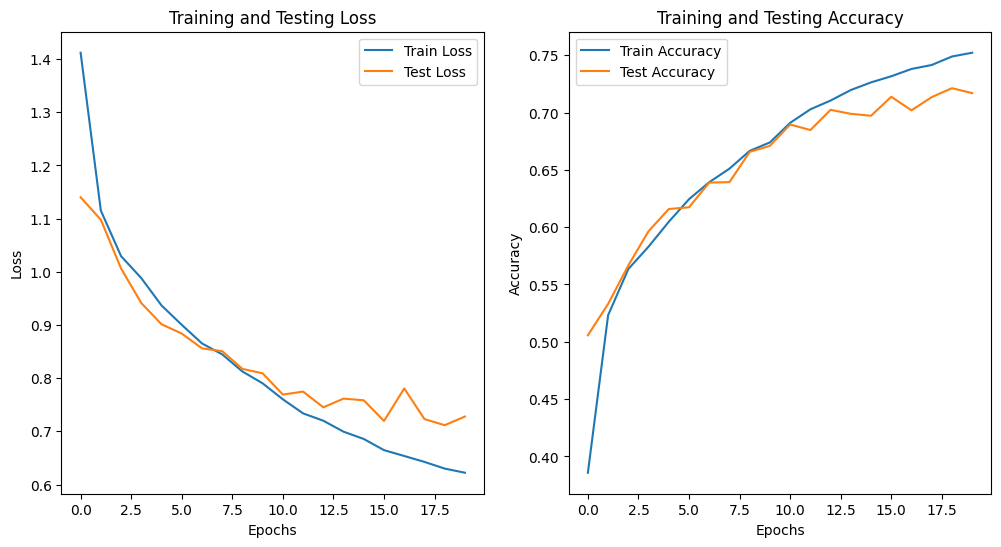

In [ ]:
# 그래프 그리기
epochs_range = range(epochs)

plt.figure(figsize=(12, 6))

# 손실 그래프
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_loss, label="Train Loss")
plt.plot(epochs_range, test_loss, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Testing Loss")
plt.legend()

# 정확도 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_acc, label="Train Accuracy")
plt.plot(epochs_range, test_acc, label="Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Testing Accuracy")
plt.legend()

plt.show()


# 결과 확인

In [ ]:
preds, labels = [], []
with torch.no_grad(): # 기울기 계산x
        for i, (img, label) in enumerate(testloader): # testloader에서 배치 단위로 img, label 가져옴
            prediction = model(img) # model 사용해 이미지 예측
            loss = lossfunc(prediction, label) # loss 계산

            total_test_loss += loss.item()
            correct_test = torch.argmax(prediction, dim=1) # 예측 확률에서 가장 높은 값을 가진 클래스를 선택

            preds.extend(list(correct_test.cpu().numpy())) # preds에 값 추가
            labels.extend(list(label.cpu().numpy())) # labels에 값 추가

ans_test = pd.DataFrame({'preds':preds, 'labels':labels}) # dataframe 구성
ans_test.head(10) # 10개 결과 도출

,preds,labels
0,3,2
1,4,4
2,4,4
3,1,1
4,3,2
5,1,1
6,0,0
7,4,0
8,1,1
9,3,3
